
Model Evaluation Results (Including SVM and Neural Network):
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.747737   0.737738  0.768767  0.752932  0.823335
1        Decision Tree  0.652395   0.654198  0.646548  0.650351  0.652106
2        Random Forest  0.732648   0.714933  0.773859  0.743230  0.807327
3                  SVM  0.747265   0.722618  0.802622  0.760522  0.815015
4       Neural Network  0.739674   0.721713  0.780177  0.749807  0.815060


<Figure size 1000x500 with 0 Axes>

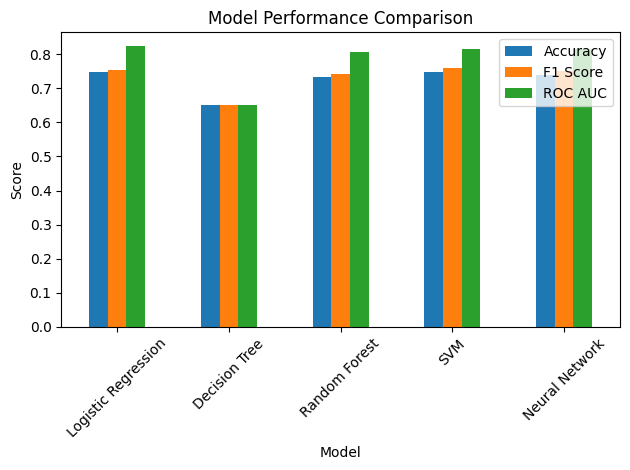


Top 10 Important Features by Each Model:
    Logistic Regression Decision Tree Random Forest            SVM  \
0               GenHlth        HighBP           BMI         HighBP   
1                   BMI           BMI           Age  AnyHealthcare   
2                   Age           Age       GenHlth      Education   
3                HighBP       GenHlth        Income            Age   
4              HighChol        Income        HighBP            Sex   
5             CholCheck      PhysHlth      PhysHlth       DiffWalk   
6     HvyAlcoholConsump     Education     Education       PhysHlth   
7                Income      MentHlth      MentHlth       MentHlth   
8                   Sex        Smoker      HighChol        GenHlth   
9  HeartDiseaseorAttack        Fruits        Fruits    NoDocbcCost   

  Neural Network  
0            BMI  
1        GenHlth  
2            Age  
3         Income  
4         Smoker  
5         HighBP  
6      Education  
7            Sex  
8         Fruits

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Read and shuffle data
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 2. feature and label
X = df_shuffled.drop(columns=['Diabetes_binary'])
y = df_shuffled['Diabetes_binary']
feature_names = X.columns

# 3. Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Data set partitioning
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# 5. Define Model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# 6. Model training and evaluation
results = []

for name, model in models.items():
    if name in ["Logistic Regression", "SVM", "Neural Network"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })

# 7. Output 
results_df = pd.DataFrame(results)
print("\nModel Evaluation Results (Including SVM and Neural Network):")
print(results_df)

# 8. Visualization result comparison
plt.figure(figsize=(10, 5))
results_df.set_index("Model")[["Accuracy", "F1 Score", "ROC AUC"]].plot(kind='bar', rot=45)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

# 9. 初始化与训练模型
lr_model = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm_model = SVC(probability=True, random_state=42).fit(X_train_scaled, y_train)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42).fit(X_train_scaled, y_train)

# 10. Initialization and training of the model
lr_importance = np.abs(lr_model.coef_[0])
dt_importance = dt_model.feature_importances_
rf_importance = rf_model.feature_importances_
svm_importance = np.abs(svm_model.coef_[0]) if hasattr(svm_model, "coef_") else np.zeros(len(feature_names))
nn_importance = np.abs(nn_model.coefs_[0]).sum(axis=1)  # 从输入层到第1隐藏层的权重绝对值和作为 proxy

# 11. Obtain the top 10 features of each model
top_n = 10
top_lr = pd.Series(lr_importance, index=feature_names).sort_values(ascending=False).head(top_n)
top_dt = pd.Series(dt_importance, index=feature_names).sort_values(ascending=False).head(top_n)
top_rf = pd.Series(rf_importance, index=feature_names).sort_values(ascending=False).head(top_n)
top_svm = pd.Series(svm_importance, index=feature_names).sort_values(ascending=False).head(top_n)
top_nn = pd.Series(nn_importance, index=feature_names).sort_values(ascending=False).head(top_n)

# 12. The merged result is presented in a table
top_features_all_models = pd.DataFrame({
    "Logistic Regression": top_lr.index,
    "Decision Tree": top_dt.index,
    "Random Forest": top_rf.index,
    "SVM": top_svm.index,
    "Neural Network": top_nn.index
})

# 13. Show the outome
print("\nTop 10 Important Features by Each Model:")
print(top_features_all_models)